In [1]:
import sys
from mpasanalysis import *
%matplotlib inline

In [2]:
def plot_hlines(yfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    ymin, ymax = axis.get_ylim()
    yf = ymin+yfrac*(ymax-ymin)
    plt.axhline(yf, **kwargs)
def plot_vlines(xfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    xmin, xmax = axis.get_xlim()
    xf = xmin+xfrac*(xmax-xmin)
    plt.axvline(xf, **kwargs)

Reading mesh data from /home/qingli/scratch/superparameterization/sp_mixed_layer_eddy/init.nc


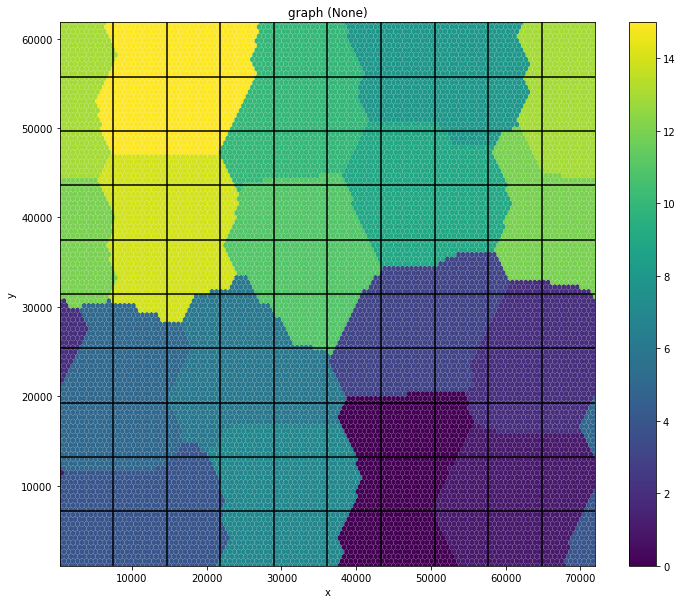

In [3]:
# graph file
root_dir = '/home/qingli/scratch/superparameterization/sp_mixed_layer_eddy'
graph_file = root_dir+'/graph.info.part.16'
mesh_file = root_dir+'/init.nc'
data = np.loadtxt(graph_file)
mesh = MPASMesh(filepath=mesh_file)
graph = MPASODomain(data=data, mesh=mesh, position='cell', name='graph')
fig_xy = plt.figure(figsize=[12,10])
graph.plot()
axis = plt.gca()
for frac in np.linspace(0.1,0.9, 9):
    plot_vlines(frac, axis=axis, color='k')
    plot_hlines(frac, axis=axis, color='k')